In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [80]:
df_12v = pd.read_csv('../docs/12v_1000data_250delay.csv')
df_12v

,voltage,current,power
0,11.99,0.06,0.69
1,12.16,0.06,0.70
2,12.04,0.04,0.52
3,11.99,0.00,0.00
4,12.01,0.13,1.58
...,...,...,...
995,12.01,0.12,1.40
996,12.01,0.22,2.64
997,11.96,0.10,1.22
998,12.01,0.13,1.58


g:\Program\Python\__env\Yolo2TFLite\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='voltage', ylabel='Density'>

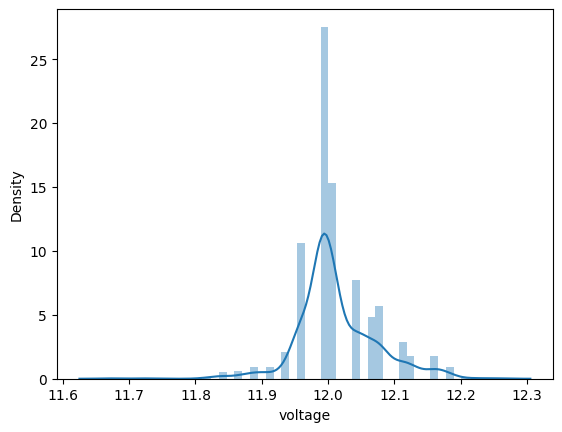

In [81]:
sns.distplot(df_12v['voltage'])

In [82]:
df_12v['Percentage Error (%)'] = (((df_12v['voltage']-0.5)/0.5) * 100)

In [83]:
df_12v

,voltage,current,power,Percentage Error (%)
0,11.99,0.06,0.69,2298.0
1,12.16,0.06,0.70,2332.0
2,12.04,0.04,0.52,2308.0
3,11.99,0.00,0.00,2298.0
4,12.01,0.13,1.58,2302.0
...,...,...,...,...
995,12.01,0.12,1.40,2302.0
996,12.01,0.22,2.64,2302.0
997,11.96,0.10,1.22,2292.0
998,12.01,0.13,1.58,2302.0


g:\Program\Python\__env\Yolo2TFLite\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Percentage Error (%)', ylabel='Density'>

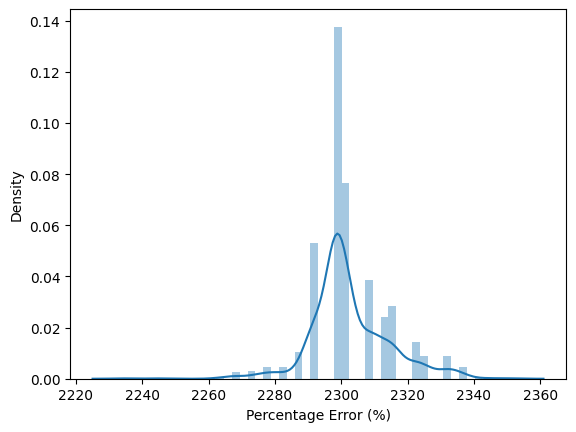

In [84]:
sns.distplot(df_12v['Percentage Error (%)'], kde=True)

In [28]:

def calc_sample_mean(df, sample_size, no_of_sample_means):
    mean = []
    for i in range(no_of_sample_means):        
        sample_base = df.sample(n=sample_size)
        sample_mean=sample_base.mean()
        mean.append(sample_mean)
    return mean

In [62]:
df_12v['Percentage Error (%)'].mean()

-2.907999999999998

In [74]:
mean_2=calc_sample_mean(df_12v['Percentage Error (%)'], sample_size=100, no_of_sample_means=1000)
sum(mean_2)/len(mean_2)

-2.9045799999999997

g:\Program\Python\__env\Yolo2TFLite\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:ylabel='Density'>

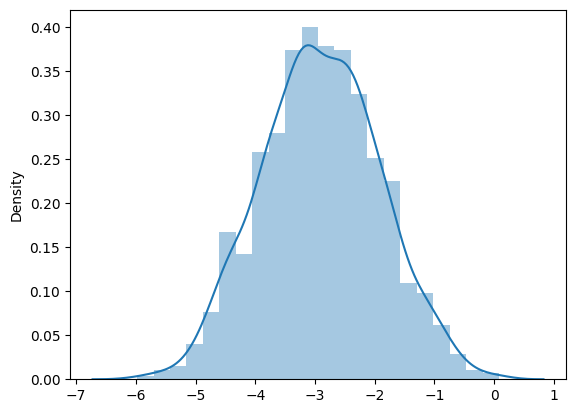

In [75]:
sns.distplot(mean_2)

In [65]:
mean_2
df = pd.DataFrame(mean_2)
df['voltage'] = "0.5"
df.columns = ["value","voltage"]
df


,value,voltage
0,-2.42,0.5
1,-2.82,0.5
2,-1.36,0.5
3,-3.42,0.5
4,-3.14,0.5
...,...,...
995,-2.32,0.5
996,-2.66,0.5
997,-3.86,0.5
998,-4.48,0.5


In [66]:
import statsmodels.api as sm

from statsmodels.formula.api import ols
rem_outlier = ols('value ~ voltage', data = df).fit()
ANOVA_REMOVE = sm.stats.anova_lm(rem_outlier)

In [67]:
import scipy.stats as stats

w, pvalue = stats.shapiro(rem_outlier.resid)
print(w, pvalue)

0.9983997344970703 0.4908932149410248


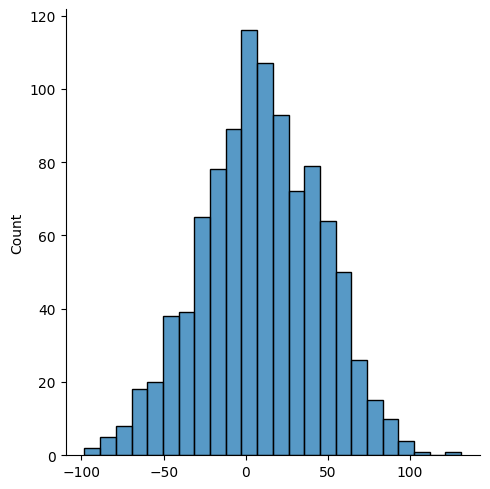

In [79]:
noise = np.random.normal(0,5,1000) + np.random.normal(10,35,1000)

sns.displot(noise)